In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import os.path as path
import wget

In [2]:
def LoadFiles(file,url):
    if not path.exists(file):
        Path_ = wget.download(url,file)
        print('File loaded')
    else:
        Path_ = file
        
    return Path_

In [3]:
file = 'Data/Do.wav'
url = 'https://github.com/asegura4488/DataBase/blob/main/MetodosComputacionales/Do.wav'
file1 = 'Data/Sol.wav'
url1 = 'https://github.com/asegura4488/DataBase/blob/main/MetodosComputacionales/Sol.wav'

In [4]:
#Path1 = LoadFiles(file,url)
#Path2 = LoadFiles(file1,url1)

In [5]:
rated, do = wav.read(file)
rates, sol = wav.read(file1)

In [6]:
Frecuenciasdo = np.arange(0, do.shape[0]//2 + 1)
Frecuenciassol = np.arange(0, sol.shape[0]//2 + 1)

In [7]:
fftdo = np.fft.rfft(do)
fftsol = np.fft.rfft(sol)

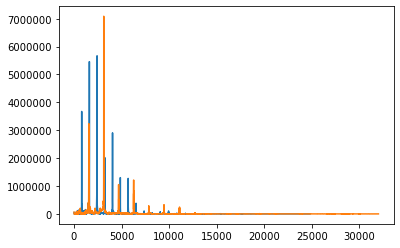

In [8]:
plt.plot(Frecuenciasdo,np.abs(fftdo))
plt.plot(Frecuenciassol,np.abs(fftsol))

In [9]:
mask = Frecuenciassol > 3000

In [10]:
fftsol[mask] = 0
NewFreqSol = np.arange(len(fftsol))

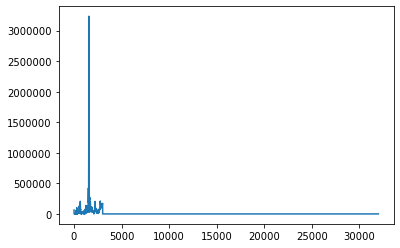

In [11]:
plt.plot(NewFreqSol,np.abs(fftsol))

In [12]:
NuevaNota = np.fft.irfft(fftsol)

In [13]:
NuevoSol = NuevaNota.astype(np.int16)
wav.write("NuevoSol.wav",rates,NuevoSol)